In [1]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [3]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,0.0,-0.005042,0.006361,1.567715,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,0.0,-0.001514,-0.009787,0.946463,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,0.0,-0.005869,-0.024194,6.252890,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.0,0.002599,-0.001359,-0.473211,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,0.0,-0.002420,0.004862,1.776159,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,0.0,-0.001801,-0.007760,-2.365016,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.0,0.001977,-0.003229,-0.770855,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,0.0,-0.005964,0.005382,3.785917,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,0.0,-0.030275,-0.063700,27.234844,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [5]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 

toxcast=toxcast.reindex(columns={'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative','smiles_r' })

toxcast=toxcast.dropna(thresh=(len(toxcast.columns)-11))

toxcast=toxcast.fillna(0)
toxcast['combined_assay']=   toxcast.BSK_SAg_Proliferation_down + toxcast.BSK_LPS_SRB_down + toxcast.ACEA_T47D_80hr_Negative + toxcast.BSK_3C_Vis_down+toxcast.APR_HepG2_CellLoss_24h_dn+toxcast.BSK_CASM3C_Proliferation_down+toxcast.BSK_4H_SRB_down+toxcast.BSK_hDFCGF_Proliferation_down+toxcast.BSK_3C_Proliferation_down+toxcast.APR_HepG2_CellLoss_72h_dn+toxcast.BSK_SAg_SRB_down+toxcast.BSK_3C_SRB_down

toxcast=toxcast[['combined_assay', 'smiles_r']]

toxcast['combined_assay']=toxcast['combined_assay']/12

toxcast['combined_assay']=toxcast['combined_assay'].apply(np.ceil)
toxcast

,combined_assay,smiles_r
9,1.0,O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)...
12,0.0,CC(=O)Nc1ccc(O)cc1
15,1.0,CCCCCCCCCc1ccc(O)cc1
16,1.0,CC(C)=CC1C(C(=O)OCc2coc(Cc3ccccc3)c2)C1(C)C
19,1.0,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1
...,...,...
629,1.0,O=C(O)COc1ccc(Cl)cc1Cl
633,0.0,CCC(Cc1c(I)cc(I)c(N)c1I)C(=O)O
637,1.0,Oc1ccc(Cl)cc1Cc1cc(Cl)ccc1O
640,1.0,CCN(CC)C(=S)SSC(=S)N(CC)CC


In [6]:
tox_list=[   'combined_assay']             

In [7]:
our_data=toxcast.reindex(columns=tox_list)

In [8]:
our_data

,combined_assay
9,1.0
12,0.0
15,1.0
16,1.0
19,1.0
...,...
629,1.0
633,0.0
637,1.0
640,1.0


In [9]:
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [10]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    86
0.0    49
Name: combined_assay, dtype: int64


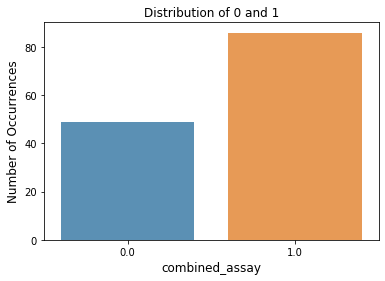

Total Compounds in Assay:  135
pca explained variance by first two components:  0.7280338488123717


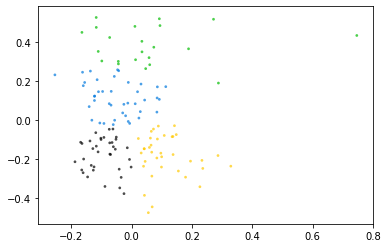

Start
1    41
3    36
0    36
2    22
Name: Cluster_PC1_PC2, dtype: int64


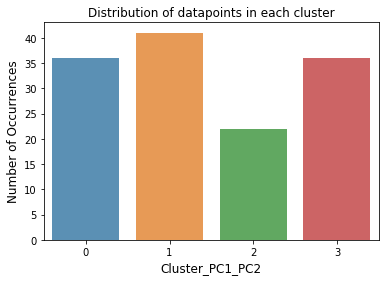

Total Selected CP features:  127
Total Selected train:  94
Total Selected test:  41
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   24.8s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   45.3s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  2]
 [17 17]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.23      0.71      0.34         7
         1.0       0.89      0.50      0.64        34

    accuracy                           0.54        41
   macro avg       0.56      0.61      0.49        41
weighted avg       0.78      0.54      0.59        41

Total Selected CP features:  66
Total

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   21.7s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   41.8s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5 20]
 [ 3  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.20      0.30        25
         1.0       0.29      0.73      0.41        11

    accuracy                           0.36        36
   macro avg       0.46      0.46      0.36        36
weighted avg       0.52      0.36      0.34        36

Total Selected CP features:  35
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    7.4s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   21.4s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   40.9s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1 14]
 [ 9 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.10      0.07      0.08        15
         1.0       0.46      0.57      0.51        21

    accuracy                           0.36        36
   macro avg       0.28      0.32      0.30        36
weighted avg       0.31      0.36      0.33        36

Total Selected CP features:  43
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:    8.6s
[Parallel(n_jobs=40)]: Done 370 tasks      | elapsed:   22.3s
[Parallel(n_jobs=40)]: Done 720 tasks      | elapsed:   42.2s
[Parallel(n_jobs=40)]: Done 1170 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 1720 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 2370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 3120 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  3.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  0]
 [ 6 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.25      1.00      0.40         2
         1.0       1.00      0.70      0.82        20

    accuracy                           0.73        22
   macro avg       0.62      0.85      0.61        22
weighted avg       0.93      0.73      0.79        22



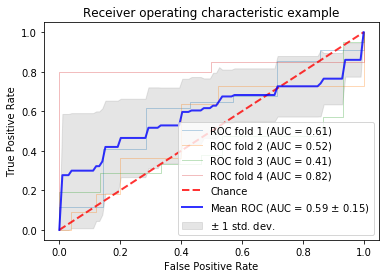

Mean of Each fold


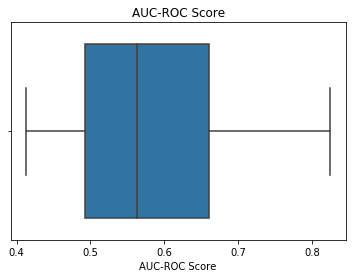

AUC-ROC all:  [0.6050420168067228, 0.52, 0.4126984126984127, 0.825]
AUC-ROC = 0.59 ± 0.15)


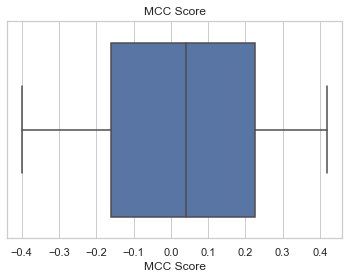

Matthews_corrcoef all:  [0.16169387039666994, -0.08058229640253803, -0.398348237954329, 0.4183300132670378]
Matthews_corrcoef = 0.025 ± 0.302)


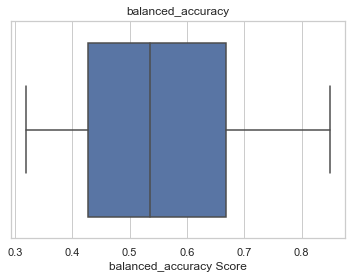

balanced_accuracy all:  [0.6071428571428572, 0.4636363636363636, 0.319047619047619, 0.85]
balanced_accuracy = 0.56 ± 0.20)


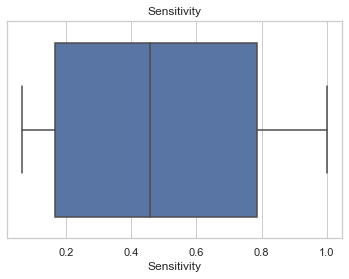

Sensitivity all:  [0.7142857142857143, 0.2, 0.06666666666666667, 1.0]
Sensitivity = 0.50 ± 0.38)


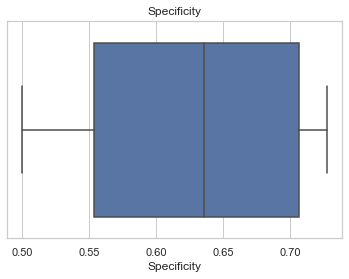

Specificity all:  [0.5, 0.7272727272727273, 0.5714285714285714, 0.7]
Specificity = 0.62 ± 0.09)
One Combined Confusion Matrix
conf_matrix: 
  [[13 36]
 [35 51]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.27      0.27      0.27        49
         1.0       0.59      0.59      0.59        86

    accuracy                           0.47       135
   macro avg       0.43      0.43      0.43       135
weighted avg       0.47      0.47      0.47       135

matthews_corrcoef
-0.14231373621534946
balanced_accuracy_score
0.42916468913146655
Sensitivity
0.2653061224489796
Specificity
0.5930232558139535
AUC-ROC for the combined results: 


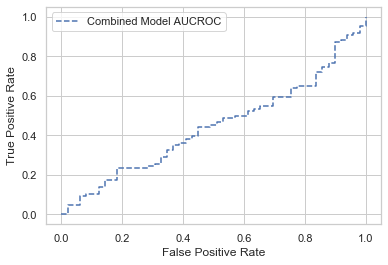

Combined Model AUC ROC:  0.44328429046037016


In [11]:
list_of_lists = []

for col in tox_list:
    method = "CP_KS_0.02"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
  
    n_cluster=4
        
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp=df_temp.dropna(subset=[target])
    df_temp = df_temp.loc[:,df_temp.apply(pd.Series.nunique) != 1]
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    data=df_temp
    data=data.drop('smiles_r', axis = 1)
    
    X, y = data.loc[:, data.columns != target], data[target]
    
    X=X.values
    y=y.values
    
    print("Total Compounds in Assay: ", len(X))
    
    #PCA to groups
    
    df_temp['MolWt']=df_temp['smiles_r'].apply(GetExactMolWt)
    df_temp['TPSA']=df_temp['smiles_r'].apply(GetCalcTPSA) #Topological Polar Surface Area
    df_temp['nRotB']=df_temp['smiles_r'].apply(GetNumRotatableBonds) #Number of rotable bonds
    df_temp['HBD']=df_temp['smiles_r'].apply(GetNumHDonors) #Number of H bond donors
    df_temp['HBA']=df_temp['smiles_r'].apply(GetNumHAcceptors) #Number of H bond acceptors
    df_temp['LogP']=df_temp['smiles_r'].apply(GetMolLogP) #LogP

    descriptors = df_temp.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values
    descriptors_std = StandardScaler().fit_transform(descriptors)
    
    pca = PCA()
    descriptors_2d = pca.fit_transform(descriptors_std)
    descriptors_pca= pd.DataFrame(descriptors_2d)
    descriptors_pca.index = df_temp.index
    descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

    print("pca explained variance by first two components: ", (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]))

    # This normalization will be performed just for PC1 and PC2, but can be done for all the components.
    scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
    scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

    # And we add the new values to our PCA table
    descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
    descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    
  
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    plt.show()
    
    
    df_temp['Cluster_PC1_PC2'] = pd.Series(kmeans.labels_, index=df_temp.index)
    print("Start")
    cluster_counts=df_temp['Cluster_PC1_PC2'].value_counts()
    print(df_temp['Cluster_PC1_PC2'].value_counts())
    plt.figure()
    sns.barplot(cluster_counts.index, cluster_counts.values, alpha=0.8)
    plt.title('Distribution of datapoints in each cluster')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Cluster_PC1_PC2', fontsize=12)
    plt.show()
    
    
    outercv = GroupKFold(n_splits=n_cluster)
    outercv.get_n_splits(X, y, kmeans.labels_)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    #combined_y_proba=[[]]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y, kmeans.labels_)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rows_train= np.concatenate((X_train, y_train[:,None]),axis=1)
        new_df_train = pd.DataFrame(rows_train, columns=data.columns)
        
        rows_test= np.concatenate((X_test, y_test[:,None]),axis=1)
        new_df_test = pd.DataFrame(rows_test, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train.columns:
        
            inactives=new_df_train[num][new_df_train[target]==0]
            actives=new_df_train[num][new_df_train[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data=new_df_train[col_list]
        test_data=new_df_test[col_list]
    
        X_train, y_train = train_data.loc[:, train_data.columns != target], train_data[target]
    
        X_train=X_train.values
        y_train=y_train.values
        
        X_test, y_test = test_data.loc[:, test_data.columns != target], test_data[target]
    
        X_test=X_test.values
        y_test=y_test.values
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
               
        param_grid= { 
        'max_depth': [10, 15, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs=40, verbose = 1)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    
    
    print("Mean of Each fold")
    
    sns.boxplot(x=aucs).set(title = 'AUC-ROC Score', xlabel = 'AUC-ROC Score' )
    plt.show()
    print("AUC-ROC all: ",(aucs))
    print(r"AUC-ROC = %0.2f ± %0.2f)" % (np.mean(aucs), np.std(aucs)))
    row=[col, method, 'AUC-ROC'] + aucs
    list_of_lists.append(row)
    sns.set(style="whitegrid")    
    
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print(r"Matthews_corrcoef = %0.3f ± %0.3f)" % (np.mean(mat_cof), np.std(mat_cof)))
    row=[col, method, 'MCC'] + mat_cof
    list_of_lists.append(row)
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print(r"balanced_accuracy = %0.2f ± %0.2f)" % (np.mean(ba), np.std(ba)))
    row=[col, method, 'BA'] + ba
    list_of_lists.append(row)
    
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print(r"Sensitivity = %0.2f ± %0.2f)" % (np.mean(sen), np.std(sen)))
    row=[col, method, 'SEN'] + sen
    list_of_lists.append(row)
    
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print(r"Specificity = %0.2f ± %0.2f)" % (np.mean(spe), np.std(spe)))
    row=[col, method, 'SPE'] + spe
    list_of_lists.append(row)
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    print(matthews_corrcoef(combined_y_test, combined_y_pred))
    
    print('balanced_accuracy_score')
    print(balanced_accuracy_score(combined_y_test, combined_y_pred))
    
    print('Sensitivity')   
    print(combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1]))
    
    print('Specificity')  
    print(combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1]))
       
    print("AUC-ROC for the combined results: ")
    
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("Combined Model AUC ROC: ", roc_value_combined_model)

  
    

In [12]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "metric", "1", "2", "3", "4"])
df['mean']=df.drop(['target', 'method', 'metric'], axis=1).apply(lambda x: x.mean(), axis=1)
df['std']=df.drop(['target', 'method','metric'], axis=1).apply(lambda x: x.std(), axis=1)
df['value']= df['mean'].round(2).astype(str) + " ± " + df['std'].round(2).astype(str)

In [13]:
df

,target,method,metric,1,2,3,4,mean,std,value
0,combined_assay,CP_KS_0.02,AUC-ROC,0.605042,0.520000,0.412698,0.82500,0.590685,0.151480,0.59 ± 0.15
1,combined_assay,CP_KS_0.02,MCC,0.161694,-0.080582,-0.398348,0.41833,0.025273,0.301565,0.03 ± 0.3
2,combined_assay,CP_KS_0.02,BA,0.607143,0.463636,0.319048,0.85000,0.559957,0.196002,0.56 ± 0.2
3,combined_assay,CP_KS_0.02,SEN,0.714286,0.200000,0.066667,1.00000,0.495238,0.378684,0.5 ± 0.38
4,combined_assay,CP_KS_0.02,SPE,0.500000,0.727273,0.571429,0.70000,0.624675,0.092977,0.62 ± 0.09


In [14]:
file_name="Metrics_"+method+".csv"
df.to_csv(file_name)